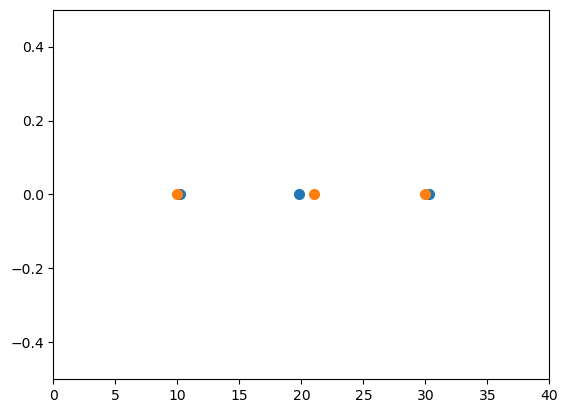

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.animation as animation 
from scipy.integrate import odeint

#simulation of a sistem with three ball connected with springs


fig = plt.figure() 
axis = plt.axes(ylim =(-1, 1)) 



def vectorfield(w, t, p):
    """function to get the field to be use on the odeint to get the solutions for the position of each ball at each instant

    Args:
        w (array): displacements of the balls
        t (int): instant of time 
        p (array): parameters of the system (constant of the springs and masses of the balls)

    Returns:
        array: vector field for this problem
    """
    x = [0] + [w[i] for i in range(len(w)) if i % 2 == 0] + [0]
    y = [w[i] for i in range(len(w)) if i % 2 != 0]
    f = []
    for i in range(len(w) // 2):
        f.append(y[i])
        f.append((-p[0][i]*(x[i+1]-x[i]) + p[0][i+1]*(x[i+2]-x[i+1]))/p[1][i])
    return f
    
t = np.arange(0,10.22,0.02)
p = [[800,900,500,800],[10,15,20]] #[k,m] with k be the constant of each spring and m the mass of each ball
w0 = [0,0,1,0,0,0] #initial displacement of the balls
d = 10 #lenght of each spring
y = [0,0,0] #position with y
abserr = 1.0e-8
relerr = 1.0e-6

wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr) 

def init():
    """display the initial position of the balls
    """
    w = [w0[k] for k in range(len(w0)) if k % 2 == 0]
    x = [(i+1)*d + w[i] for i in range(len(w))]
    line = axis.scatter(np.array(x), y, lw = 2) 
    return line
   


def get_x(wsol,d,j):
    """gets the position of each ball at each position, based on the displacements that we calculated

    Args:
        wsol (): displacements that are the solution of the Newton equations for each instant
        d (int): spring lenght
        j (int): instant of time

    Returns:
        array: position of each ball
    """
    w = [wsol[j][k] for k in range(len(wsol[j])) if k % 2 == 0]
    x = [(i+1)*d + w[i] for i in range(len(w))]
    return x    

def animate(i):
    """function for the animation

    Args:
        i (int): frame of time
    """
    axis.clear()
    x = get_x(wsol,d,i)
    line = axis.scatter(np.array(x), y, lw = 2)
    axis.set_ylim((-0.5,0.5))
    axis.set_xlim((0,40))
    return line
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func = init, interval = 20,frames=500) 

anim.save('ani3.gif',writer='pillow',fps=10)